# Author : Shubhankar Anuragi

##### Task for internship @ Bharat Intern

##### Take stock price of any company you want and predicts its price by using LSTM. Use only Jupyter notebook code.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
stockData= pd.read_csv('./dataset/AAPL_data.csv')

In [6]:
stockData.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [7]:
stockData = stockData [['date', 'open', 'close']]

In [42]:
stockData.head()

,date,open,close
0,2013-02-08,67.7142,67.8542
1,2013-02-11,68.0714,68.5614
2,2013-02-12,68.5014,66.8428
3,2013-02-13,66.7442,66.7156
4,2013-02-14,66.3599,66.6556


In [128]:
stockData.tail()

,open,close
date,,
2018-02-01,0.901530,0.907022
2018-02-02,0.892130,0.848060
2018-02-05,0.836461,0.815583
2018-02-06,0.802010,0.868551
2018-02-07,0.868612,0.840285


In [43]:
stockData['date']= pd.to_datetime(stockData['date'].apply(lambda x: x.split()[0])) 

In [47]:
stockData.set_index('date', drop=True, inplace=True)

<Axes: xlabel='date'>

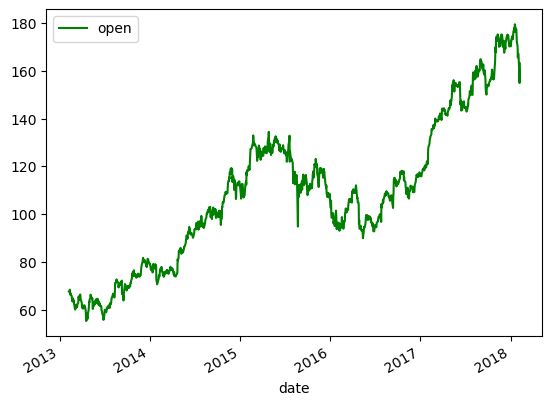

In [48]:
oppen = stockData [['open']]
oppen.plot( use_index=True, color='g')

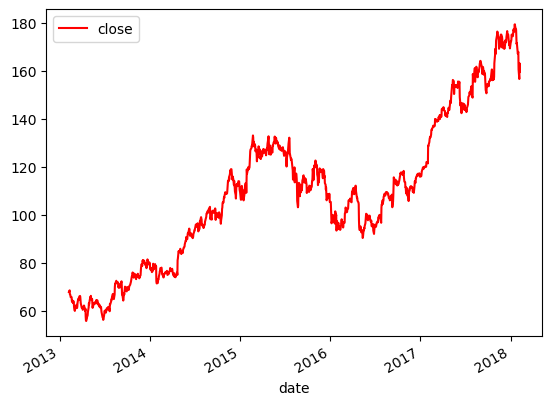

In [50]:
close = stockData [['close']]
close.plot(use_index=True, color='r')
plt.show()

In [51]:
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler
import numpy as np

In [52]:
# sc_X = StandardScaler()
minmax = MinMaxScaler()

In [53]:
stockData[stockData.columns] = minmax.fit_transform(stockData)

In [54]:
train_data_size = round(len(stockData)*0.80)

In [55]:
train_data = stockData [:train_data_size]
test_data  = stockData [train_data_size:]

In [56]:
def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): 
    sequences.append(dataset.iloc[start_idx : stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))



In [104]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)

In [116]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [117]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

In [118]:
model.add(Dropout(0.1)) 
model.add(LSTM(units=50))
model.add(Dense(2))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

In [119]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 50, 50)            10600     
                                                                 
 dropout_10 (Dropout)        (None, 50, 50)            0         
                                                                 
 lstm_14 (LSTM)              (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 2)                 102       
                                                                 
Total params: 30902 (120.71 KB)
Trainable params: 30902 (120.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [120]:
model.fit(train_seq, train_label, epochs=80,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/80
30/30 [==============================] - 6s 63ms/step - loss: 0.0173 - mean_absolute_error: 0.0913 - val_loss: 0.0178 - val_mean_absolute_error: 0.1251
Epoch 2/80
30/30 [==============================] - 1s 37ms/step - loss: 0.0014 - mean_absolute_error: 0.0294 - val_loss: 0.0070 - val_mean_absolute_error: 0.0732
Epoch 3/80
30/30 [==============================] - 1s 35ms/step - loss: 9.3045e-04 - mean_absolute_error: 0.0234 - val_loss: 0.0082 - val_mean_absolute_error: 0.0813
Epoch 4/80
30/30 [==============================] - 1s 36ms/step - loss: 9.1386e-04 - mean_absolute_error: 0.0227 - val_loss: 0.0059 - val_mean_absolute_error: 0.0675
Epoch 5/80
30/30 [==============================] - 1s 34ms/step - loss: 8.8757e-04 - mean_absolute_error: 0.0225 - val_loss: 0.0058 - val_mean_absolute_error: 0.0673
Epoch 6/80
30/30 [==============================] - 1s 33ms/step - loss: 8.5042e-04 - mean_absolute_error: 0.0220 - val_loss: 0.0056 - val_mean_absolute_error: 0.0658
Epoch 

Epoch 50/80
30/30 [==============================] - 1s 34ms/step - loss: 4.8728e-04 - mean_absolute_error: 0.0167 - val_loss: 8.7742e-04 - val_mean_absolute_error: 0.0233
Epoch 51/80
30/30 [==============================] - 1s 33ms/step - loss: 3.9422e-04 - mean_absolute_error: 0.0149 - val_loss: 0.0016 - val_mean_absolute_error: 0.0347
Epoch 52/80
30/30 [==============================] - 1s 33ms/step - loss: 3.6970e-04 - mean_absolute_error: 0.0144 - val_loss: 0.0019 - val_mean_absolute_error: 0.0377
Epoch 53/80
30/30 [==============================] - 1s 34ms/step - loss: 3.6914e-04 - mean_absolute_error: 0.0142 - val_loss: 0.0024 - val_mean_absolute_error: 0.0439
Epoch 54/80
30/30 [==============================] - 1s 35ms/step - loss: 4.3055e-04 - mean_absolute_error: 0.0155 - val_loss: 0.0024 - val_mean_absolute_error: 0.0426
Epoch 55/80
30/30 [==============================] - 1s 33ms/step - loss: 3.8343e-04 - mean_absolute_error: 0.0146 - val_loss: 0.0010 - val_mean_absolute_er

In [121]:
test_predicted = model.predict(test_seq)

7/7 [==============================] - 1s 10ms/step


In [122]:
test_inverse_predicted = minmax.inverse_transform(test_predicted) 

In [135]:
main_data = pd.concat([stockData.iloc[-202:].copy(),pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],index=stockData.iloc[-202:].index)], axis=1)

In [136]:
main_data[['open','close']] = minmax.inverse_transform(main_data[['open','close']])
#main_data.head()
display(main_data)

,open,close,open_predicted,close_predicted
date,,,,
2017-04-21,142.4400,142.27,140.319107,139.328125
2017-04-24,143.5000,143.64,140.810959,139.842346
2017-04-25,143.9100,144.53,141.777969,140.803528
2017-04-26,144.4700,143.68,142.599838,141.651703
2017-04-27,143.9225,143.79,142.494385,141.628754
...,...,...,...,...
2018-02-01,167.1650,167.78,161.675034,159.954376
2018-02-02,166.0000,160.50,162.610809,160.911270
2018-02-05,159.1000,156.49,158.985855,157.700897


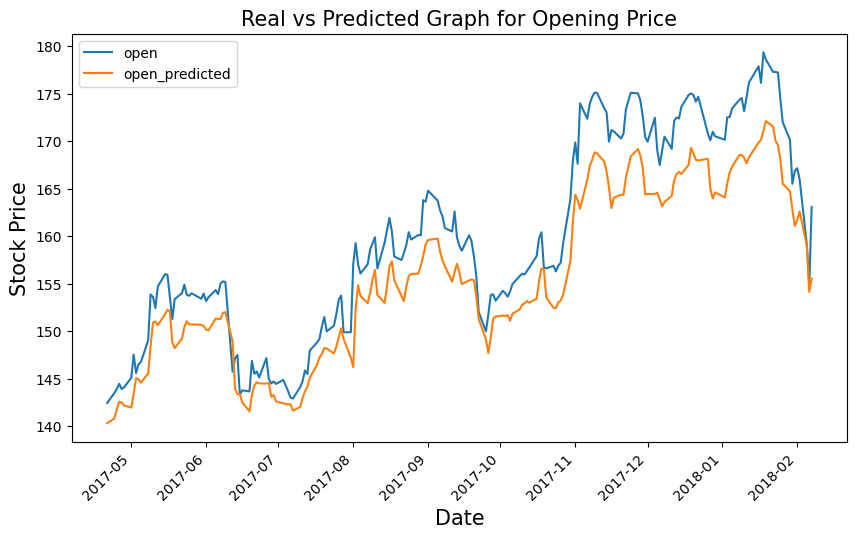

In [137]:
main_data[['open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Real vs Predicted Graph for Opening Price',size=15)
plt.show()

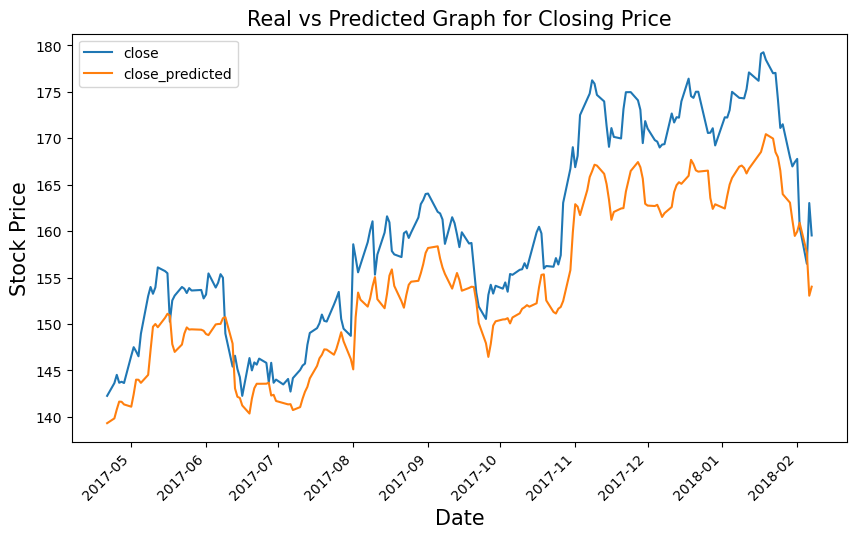

In [138]:
main_data[['close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Real vs Predicted Graph for Closing Price',size=15)
plt.show()

###### -------------------------------------------------------------------------------------E -------------------------------------------------------------------------------------
###### -------------------------------------------------------------------------------------N -------------------------------------------------------------------------------------
###### -------------------------------------------------------------------------------------D-------------------------------------------------------------------------------------


## Author

### Shubhankar Anuragi
### https://github.com/Cry22stal
### https://www.linkedin.com/in/shubhankar-anuragi-a752711a2/


###### -------------------------------------------------------------------------------------E -------------------------------------------------------------------------------------
###### -------------------------------------------------------------------------------------N -------------------------------------------------------------------------------------
###### -------------------------------------------------------------------------------------D-------------------------------------------------------------------------------------